# Preprocessing

In [1]:
import os
from PIL import Image
from IPython.display import Image
import matplotlib.pyplot as plt

In [49]:
def rename_images_in_subdirectories(directory):
    for root, _, files in os.walk(directory):
        folder_name = os.path.basename(root)

        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

        image_files.sort()

        for i, filename in enumerate(image_files, start=1):
            _, ext = os.path.splitext(filename)

            new_filename = f"{folder_name}_ok_{i}{ext}"

            os.rename(os.path.join(root, filename), os.path.join(root, new_filename))

        if image_files:
            print(f"Renamed {len(image_files)} images in '{folder_name}'.")

In [ ]:
# caped rn

In [51]:
rename_images_in_subdirectories(rn)

Renamed 1000 images in 'espresso'.
Renamed 1000 images in 'french'.
Renamed 1000 images in 'green'.
Renamed 1000 images in 'light'.


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_and_display_first_images(main_directory):
    first_images = []

    for root, dirs, files in os.walk(main_directory):
        if root == main_directory:
            continue

        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]

        if image_files:
            image_files.sort()

            first_image_file = image_files[0]
            first_image_path = os.path.join(root, first_image_file)

            image = Image.open(first_image_path)
            first_images.append((os.path.basename(root), image))

    if first_images:
        plt.figure(figsize=(12, 4))
        for i, (folder_name, image) in enumerate(first_images):
            plt.subplot(1, len(first_images), i + 1)
            plt.imshow(image)
            plt.title(f'{folder_name}\ndimensions: {image.size}')

        plt.show()

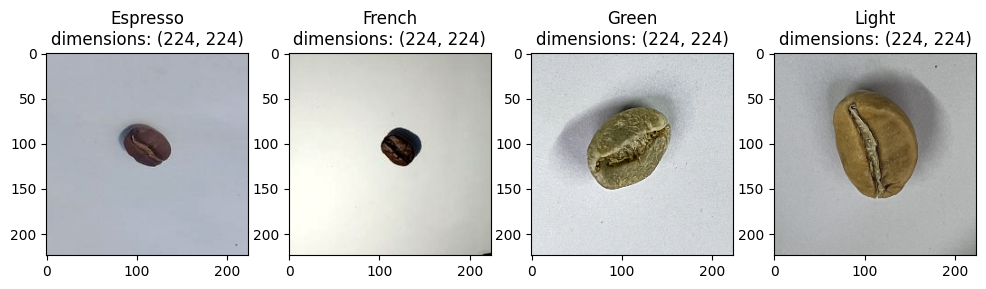

In [ ]:
load_and_display_first_images('dataset/resized')

In [14]:
import os
from PIL import Image

def resize_images(directory, target_size):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                image_path = os.path.join(root, file)
                img = Image.open(image_path)
                img_resized = img.resize(target_size, Image.Resampling.LANCZOS)
                img_resized.save(image_path)  

                print(f"Resized image {file} to {target_size}")

In [15]:
resize_images(preprocessed_dataset,(224,224))

Resized image espresso-1.jpg to (224, 224)
Resized image espresso-10.jpg to (224, 224)
Resized image espresso-100.jpg to (224, 224)
Resized image espresso-101.jpg to (224, 224)
Resized image espresso-102.jpg to (224, 224)
Resized image espresso-103.jpg to (224, 224)
Resized image espresso-104.jpg to (224, 224)
Resized image espresso-105.jpg to (224, 224)
Resized image espresso-106.jpg to (224, 224)
Resized image espresso-107.jpg to (224, 224)
Resized image espresso-108.jpg to (224, 224)
Resized image espresso-109.jpg to (224, 224)
Resized image espresso-11.jpg to (224, 224)
Resized image espresso-110.jpg to (224, 224)
Resized image espresso-111.jpg to (224, 224)
Resized image espresso-112.jpg to (224, 224)
Resized image espresso-113.jpg to (224, 224)
Resized image espresso-114.jpg to (224, 224)
Resized image espresso-115.jpg to (224, 224)
Resized image espresso-116.jpg to (224, 224)
Resized image espresso-117.jpg to (224, 224)
Resized image espresso-118.jpg to (224, 224)
Resized image 

In [ ]:
import imgaug.augmenters as iaa
import numpy as np
import os
from skimage import io
import random

def augment_images_to_target(input_directory, output_directory, augmentation_pipeline, target_per_class=1000):

    for class_subdir in next(os.walk(input_directory))[1]:
        class_dir_path = os.path.join(input_directory, class_subdir)
        output_class_dir = os.path.join(output_directory, class_subdir)

        if not os.path.exists(output_class_dir):
            os.makedirs(output_class_dir)

        image_files = [f for f in os.listdir(class_dir_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

        total_images_needed = target_per_class - len(image_files)
        if total_images_needed <= 0:
            continue

        # Randomly shuffle the image files
        random.shuffle(image_files)

        images_per_original = total_images_needed // len(image_files)

        for file in image_files:
            input_image_path = os.path.join(class_dir_path, file)
            base_filename = os.path.splitext(file)[0]

            image = io.imread(input_image_path)
            image_augmented = []

            for _ in range(images_per_original):
                image_aug = augmentation_pipeline(image=image)
                image_augmented.append(image_aug)

            for idx, aug_image in enumerate(image_augmented, 1):
                filename = f"{base_filename}_augmented_{idx}.png"
                io.imsave(os.path.join(output_class_dir, filename), aug_image)

        # Augment remaining images to meet the target
        remaining_images_needed = target_per_class - len(os.listdir(output_class_dir))
        for idx in range(remaining_images_needed):
            file = random.choice(image_files)
            input_image_path = os.path.join(class_dir_path, file)
            base_filename = os.path.splitext(file)[0]

            image = io.imread(input_image_path)
            image_aug = augmentation_pipeline(image=image)
            filename = f"{base_filename}_augmented_extra_{idx}.png"
            io.imsave(os.path.join(output_class_dir, filename), image_aug)

rotation_angles = [90, 180, 270]

augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=random.choice(rotation_angles)),
    iaa.Multiply((0.8, 1.2)),
    iaa.LinearContrast((0.8, 1.2))
])

input_directory = 'dataset/resized'
output_directory = 'dataset/Augmented_imageX224'

augment_images_to_target(input_directory, output_directory, augmentation_pipeline)

In [1]:
import numpy as np
np.__version__

'1.26.0'

In [ ]:
import os
import pandas as pd

def gp(directory):
    image_counts = {}
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            image_count = len([f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f))])
            image_counts[subdir] = image_count
    
    return image_counts

original_dataset = 'dataset/resized'
output_directory = 'dataset/Augmented_imageX224'
original_counts = gp(original_dataset)
augmented_counts = gp(output_directory)

df = pd.DataFrame(list(original_counts.items()), columns=['Class', 'Original Count'])

pd.DataFrame()
df['Augmented Count'] = df['Class'].map(augmented_counts)

df

,Class,Original Count,Augmented Count
0,espresso,207,1000
1,french,207,1000
2,green,207,1000
3,light,207,1000


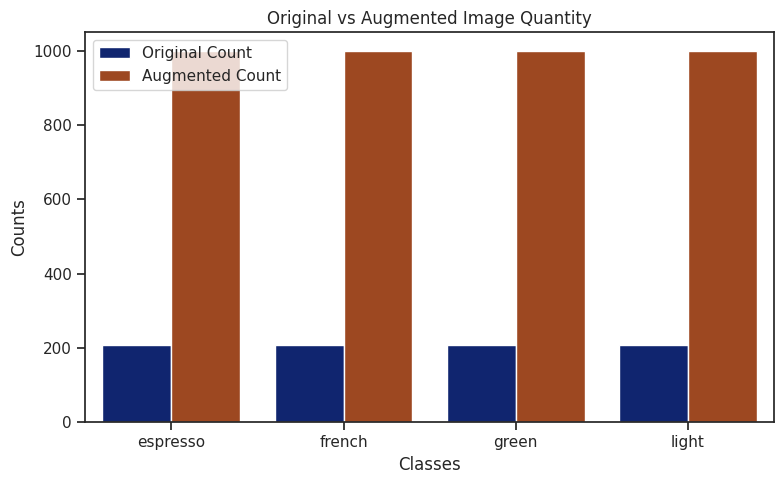

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

plt.figure(figsize=(8, 5))

sns.barplot(data=df.melt(id_vars='Class', var_name='Type', value_name='Count'),
            x='Class', y='Count', hue='Type', palette='dark')

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Original vs Augmented Image Quantity')
plt.legend(title='')

plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import random
from tqdm import tqdm

def split_ds(source_dir, train_dir, test_dir, val_dir, split_ratio=(0.8, 0.1, 0.1)):
    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        val_class_dir = os.path.join(val_dir, class_name)

        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)

        files = os.listdir(class_dir)
        random.shuffle(files)

        num_files = len(files)
        train_split = int(num_files * split_ratio[0])
        test_split = int(num_files * split_ratio[1])

        train_files = files[:train_split]
        test_files = files[train_split:train_split + test_split]
        val_files = files[train_split + test_split:]

        for file in tqdm(train_files, desc=f"Copying {class_name} train files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_class_dir, file))

        for file in tqdm(test_files, desc=f"Copying {class_name} test files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(test_class_dir, file))

        for file in tqdm(val_files, desc=f"Copying {class_name} validation files"):
            shutil.copy(os.path.join(class_dir, file), os.path.join(val_class_dir, file))

source_d = 'dataset/Augmented_imageX224'
train_d = 'dataset/split/train'
test_d = 'dataset/split/test'
val_d = 'dataset/split/valid'

split_ds(source_d, train_d, test_d, val_d)

Copying light validation files: 100%|██████████| 100/100 [00:00<00:00, 1423.70it/s]


In [3]:
import os
os.getcwd()

'/media/X/Research_coffee_classification/coffee-beans-classification/notebooks'

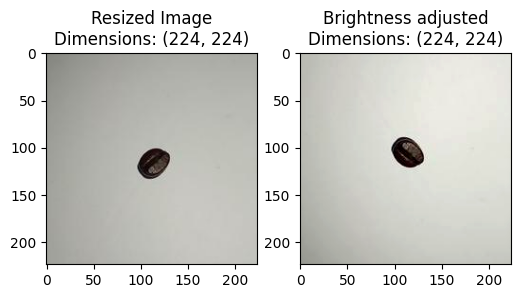

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def compare_images(original_image_path, resized_image_path):
    original_image = Image.open(original_image_path)
    resized_image = Image.open(resized_image_path)
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    ax[0].imshow(original_image)  
    ax[0].set_title(f'Resized Image\nDimensions: {original_image.size}')

    ax[1].imshow(resized_image)  
    ax[1].set_title(f'Brightness adjusted\nDimensions: {resized_image.size}')

    plt.show()

# compare_images(caped)

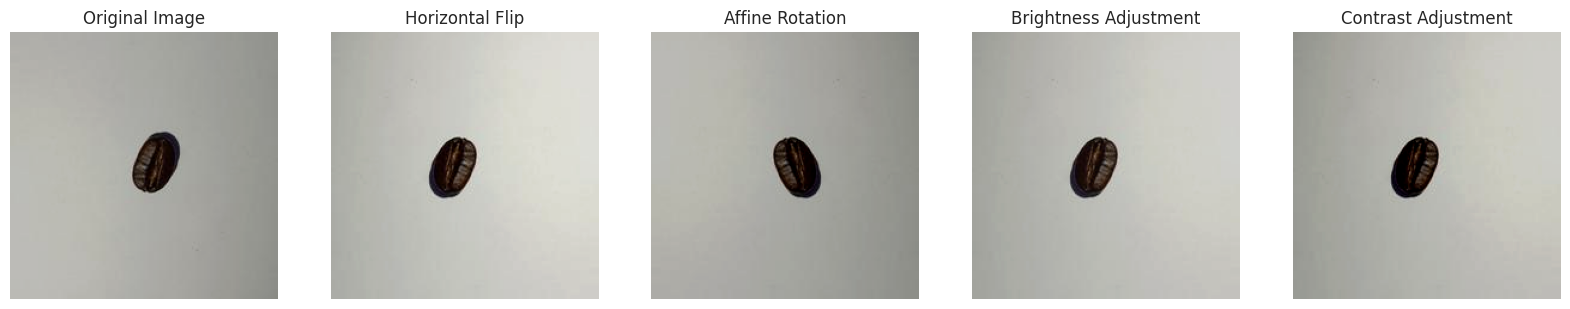

In [ ]:
import imgaug.augmenters as iaa
from skimage import io, color
import matplotlib.pyplot as plt
import os
import random

def visualize_augmentation(image_path, augmentation_pipeline):
    image = io.imread(image_path, as_gray=False)

    # Apply augmentation
    augmented_images = [augmentation_pipeline(image=image) for _ in range(4)]

    # Define augmentation labels
    augmentation_labels = [
        'Original Image',
        'Horizontal Flip',
        'Affine Rotation',
        'Brightness Adjustment',
        'Contrast Adjustment',
    ]

    # Display the original and augmented images for each augmentation feature
    plt.figure(figsize=(20, 10))
    num_images = len(augmented_images) + 1
    for idx in range(num_images):
        plt.subplot(1, 5, idx + 1)
        if idx == 0:
            plt.imshow(image)
            plt.title(augmentation_labels[0])
        else:
            plt.imshow(augmented_images[idx - 1])
            plt.title(augmentation_labels[idx])
        plt.axis('off')

    plt.show()

# Define your augmentation pipeline
rotation_angles = [90, 180, 270]
augmentation_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=random.choice(rotation_angles)),
    iaa.Multiply((0.8, 1.2)),
    iaa.LinearContrast((0.8, 1.2))
])

# Specify the directory containing the images
image_directory = 'dataset/Augmented_imageX224'

# Get the list of images in the directory
image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# Choose a random image from the directory
random_image = random.choice(image_files)

# Specify the path to the random image
image_path = os.path.join(image_directory, random_image)

# Visualize augmentation for the random image
visualize_augmentation(image_path, augmentation_pipeline)
